# 1. Exploratory Data Analytics

In [1]:
# Importing relevant packages for all models
import numpy as np
import pandas as pd
%matplotlib inline

# Load data
%pwd
filepath = './WA_Fn-UseC_-Telco-Customer-Churn.csv'
churn_data = pd.read_csv(filepath)

# output for prediction
output= 'Churn'

# feature_list generated using list(churn_data.columns)
# customerID is left out as it does not contribute to accuracy of models
feature_list = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
                'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                'MonthlyCharges', 'TotalCharges']

features = churn_data[feature_list] # A set of all features (except customerID)
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 1.1. Understanding the data
This section explores the data and see if there is a need to modify it

In [2]:
churn_data.isna().sum()
# We observe that there is no NA values and thus we do not have to remove or replace it

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [3]:
# Understanding the data
print("gender: " + str(churn_data['gender'].unique()))
print("Senior Citizen: " + str(churn_data['SeniorCitizen'].unique()))
print("Partner: " + str(churn_data['Partner'].unique()))
print("Dependents: " + str(churn_data['Dependents'].unique()))
print("tenure: " + str(churn_data['tenure'].unique()))
print("PhoneService: " + str(churn_data['PhoneService'].unique()))
print("MultipleLines: " + str(churn_data['MultipleLines'].unique()))
print("InternetService: " + str(churn_data['InternetService'].unique()))
print("OnlineSecurity: " + str(churn_data['OnlineSecurity'].unique()))
print("OnlineBackup: " + str(churn_data['OnlineBackup'].unique()))
print("DeviceProtection: " + str(churn_data['DeviceProtection'].unique()))
print("TechSupport: " + str(churn_data['TechSupport'].unique()))
print("StreamingTV: " + str(churn_data['StreamingTV'].unique()))
print("StreamingMovies: " + str(churn_data['StreamingMovies'].unique()))
print("Contract: " + str(churn_data['Contract'].unique()))
print("PaperlessBilling: " + str(churn_data['PaperlessBilling'].unique()))
print("PaymentMethod: " + str(churn_data['PaymentMethod'].unique()))
print("MonthlyCharges: " + str(churn_data['MonthlyCharges'].unique()))
print("TotalCharges: " + str(churn_data['TotalCharges'].unique()))

gender: ['Female' 'Male']
Senior Citizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCha

### 1.2. Transforming variables
This section converts categorial variables into binary variables

In [4]:
# Transforming output to binary variable 1 == Yes, 0 == No
churn_data[output] = churn_data[output].map(lambda x: 1 if x == "Yes" else 0)

# Transform features to binary features (Only 2 categories)
churn_data['gender'] = churn_data['gender'].map(lambda x: 1 if x == "Yes" else 0)
churn_data['Partner'] = churn_data['Partner'].map(lambda x: 1 if x == "Yes" else 0)
churn_data['Dependents'] = churn_data['Dependents'].map(lambda x: 1 if x == "Yes" else 0)
churn_data['PhoneService'] = churn_data['PhoneService'].map(lambda x: 1 if x == "Yes" else 0)
churn_data['PaperlessBilling'] = churn_data['PaperlessBilling'].map(lambda x: 1 if x == "Yes" else 0)

# Transform categorical features to binary features (>2 categories)
MultipleLines_dummy = pd.get_dummies(churn_data['MultipleLines'], prefix='MultipleLines')
InternetService_dummy = pd.get_dummies(churn_data['InternetService'], prefix='InternetService')
OnlineSecurity_dummy = pd.get_dummies(churn_data['OnlineSecurity'], prefix='OnlineSecurity')
OnlineBackup_dummy = pd.get_dummies(churn_data['OnlineBackup'], prefix='OnlineBackup')
DeviceProtection_dummy = pd.get_dummies(churn_data['DeviceProtection'], prefix='DeviceProtection')
TechSupport_dummy = pd.get_dummies(churn_data['TechSupport'], prefix='TechSupport')
StreamingTV_dummy = pd.get_dummies(churn_data['StreamingTV'], prefix='StreamingTV')
StreamingMovies_dummy = pd.get_dummies(churn_data['StreamingMovies'], prefix='StreamingMovies')
Contract_dummy = pd.get_dummies(churn_data['Contract'], prefix='Contract')
PaymentMethod_dummy = pd.get_dummies(churn_data['PaymentMethod'], prefix='PaymentMethod')

#store a list of temp for rearranging (shifting all continuous variables to the right and shifting output to the last column)
output_temp = churn_data[output]
tenure_temp = churn_data['tenure']
MonthlyCharges_temp = churn_data['MonthlyCharges']
TotalCharges_temp = churn_data['TotalCharges']

In [5]:
# Remove categorical columns with >2 categories (that are not binary)
churn_data= churn_data.drop(['customerID', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod',
                             'Churn', 'TotalCharges', 'tenure', 'MonthlyCharges'], axis = 1)

# Add in all the newly created columns (categorical with >2 categories)
churn_data = churn_data.join([MultipleLines_dummy, InternetService_dummy, OnlineSecurity_dummy, OnlineBackup_dummy,
                                  DeviceProtection_dummy, TechSupport_dummy, StreamingTV_dummy, StreamingMovies_dummy,
                                  Contract_dummy, PaymentMethod_dummy, tenure_temp,MonthlyCharges_temp,
                                  TotalCharges_temp,output_temp])

In [6]:
# Verify that the data is correctly manipulated
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
gender                                     7043 non-null int64
SeniorCitizen                              7043 non-null int64
Partner                                    7043 non-null int64
Dependents                                 7043 non-null int64
PhoneService                               7043 non-null int64
PaperlessBilling                           7043 non-null int64
MultipleLines_No                           7043 non-null uint8
MultipleLines_No phone service             7043 non-null uint8
MultipleLines_Yes                          7043 non-null uint8
InternetService_DSL                        7043 non-null uint8
InternetService_Fiber optic                7043 non-null uint8
InternetService_No                         7043 non-null uint8
OnlineSecurity_No                          7043 non-null uint8
OnlineSecurity_No internet service         7043 non-null uint8
OnlineSecur

### 1.3. Changing Data Type
This section aims to change all entries to float or int instead of object

In [7]:
churn_data = churn_data.drop(churn_data[churn_data['TotalCharges'] == " "].index)
churn_data['TotalCharges'] = churn_data['TotalCharges'].astype(float)

In [8]:
churn_data.info()
# Verification again

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 41 columns):
gender                                     7032 non-null int64
SeniorCitizen                              7032 non-null int64
Partner                                    7032 non-null int64
Dependents                                 7032 non-null int64
PhoneService                               7032 non-null int64
PaperlessBilling                           7032 non-null int64
MultipleLines_No                           7032 non-null uint8
MultipleLines_No phone service             7032 non-null uint8
MultipleLines_Yes                          7032 non-null uint8
InternetService_DSL                        7032 non-null uint8
InternetService_Fiber optic                7032 non-null uint8
InternetService_No                         7032 non-null uint8
OnlineSecurity_No                          7032 non-null uint8
OnlineSecurity_No internet service         7032 non-null uint8
OnlineSecur

### 1.4. Splitting the data
Split into train(70%) and test data(30%) with random seed set to 12345<br>

In [9]:
from sklearn.cross_validation import train_test_split

train_feature = churn_data.iloc[:,:40]
train_target = churn_data.iloc[:,40]

X_train, X_test, y_train, y_test = train_test_split(train_feature, train_target, test_size=0.3, random_state=12345)

C:\Users\bensj\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 1.5. Determining important features
The below code is modified from https://www.kaggle.com/grfiv4/plotting-feature-importances <br>
This section aims to help us determine which features to select for our models based on their importance.<br>
<br>
Output:
<ol>
    <li>Chart that sorts the importance of attribute according to feature_importances_
    <li>A list of column headers that is sorted by feature_importances_
</ol>

BaggingClassifier does not have feature_importances_ attribute
LogisticRegression does not have feature_importances_ attribute


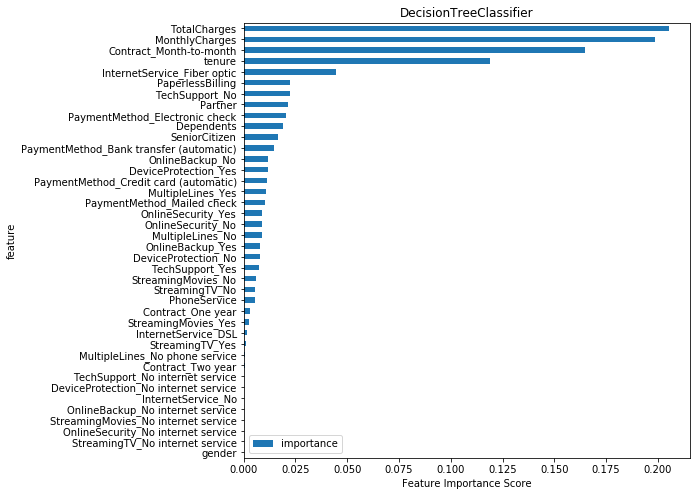

39                               TotalCharges
38                             MonthlyCharges
30                    Contract_Month-to-month
37                                     tenure
10                InternetService_Fiber optic
5                            PaperlessBilling
21                             TechSupport_No
2                                     Partner
35             PaymentMethod_Electronic check
3                                  Dependents
1                               SeniorCitizen
33    PaymentMethod_Bank transfer (automatic)
15                            OnlineBackup_No
20                       DeviceProtection_Yes
34      PaymentMethod_Credit card (automatic)
8                           MultipleLines_Yes
36                 PaymentMethod_Mailed check
14                         OnlineSecurity_Yes
12                          OnlineSecurity_No
6                            MultipleLines_No
17                           OnlineBackup_Yes
18                        DevicePr

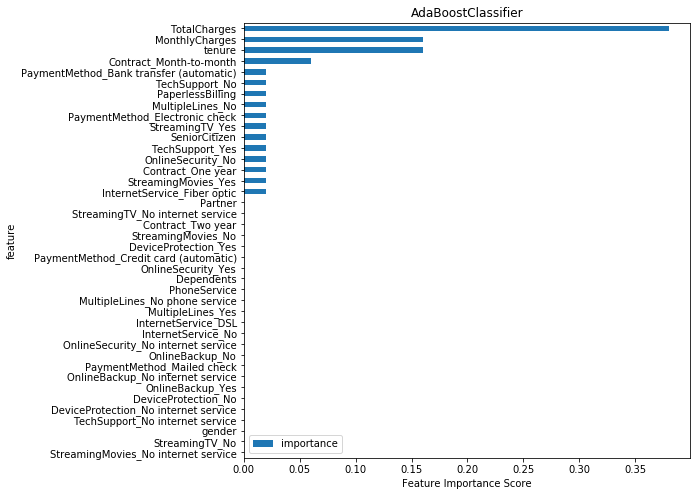

39                               TotalCharges
38                             MonthlyCharges
37                                     tenure
30                    Contract_Month-to-month
10                InternetService_Fiber optic
29                        StreamingMovies_Yes
31                          Contract_One year
12                          OnlineSecurity_No
23                            TechSupport_Yes
1                               SeniorCitizen
33    PaymentMethod_Bank transfer (automatic)
26                            StreamingTV_Yes
35             PaymentMethod_Electronic check
6                            MultipleLines_No
5                            PaperlessBilling
21                             TechSupport_No
25            StreamingTV_No internet service
32                          Contract_Two year
27                         StreamingMovies_No
28        StreamingMovies_No internet service
34      PaymentMethod_Credit card (automatic)
36                 PaymentMethod_M

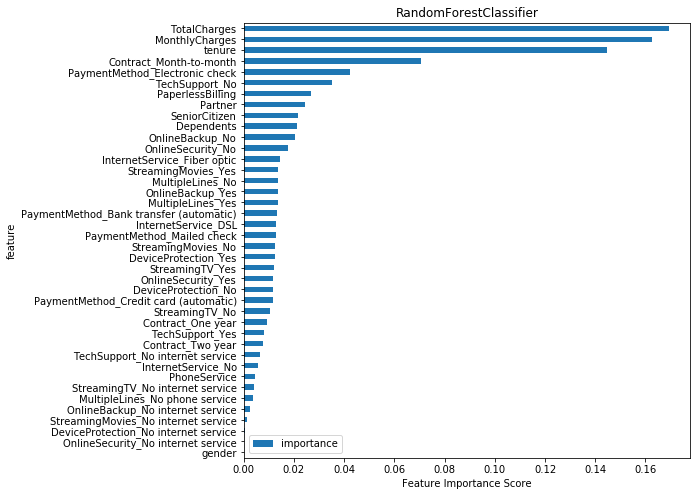

39                               TotalCharges
38                             MonthlyCharges
37                                     tenure
30                    Contract_Month-to-month
35             PaymentMethod_Electronic check
21                             TechSupport_No
5                            PaperlessBilling
2                                     Partner
1                               SeniorCitizen
3                                  Dependents
15                            OnlineBackup_No
12                          OnlineSecurity_No
10                InternetService_Fiber optic
29                        StreamingMovies_Yes
6                            MultipleLines_No
17                           OnlineBackup_Yes
8                           MultipleLines_Yes
33    PaymentMethod_Bank transfer (automatic)
9                         InternetService_DSL
36                 PaymentMethod_Mailed check
27                         StreamingMovies_No
20                       DevicePro

In [10]:
# Source: https://www.kaggle.com/grfiv4/plotting-feature-importances
# Import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=DeprecationWarning)
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action="ignore", category=ConvergenceWarning)

def plot_feature_importances(clf, X_train, y_train=None, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
    __name__ = "plot_feature_importances"
    feat_imp_list = []
    
    try: 
        if not hasattr(clf, 'feature_importances_'):
            clf.fit(X_train.values, y_train.values.ravel())

            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
    except (ValueError):
        clf.fit(X_train.values, y_train.values.ravel())
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp_list = feat_imp['feature']
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
    
    print (pd.Series(feat_imp_list))
    return feat_imp

# Converting back to a dataframe with column headers for better label of y-axis
X_train_header = pd.DataFrame(X_train, columns=train_feature.columns)
y_train = pd.DataFrame(y_train)

from sklearn.tree         import DecisionTreeClassifier
from sklearn.ensemble     import GradientBoostingClassifier
from sklearn.ensemble     import BaggingClassifier
from sklearn.ensemble     import AdaBoostClassifier
from sklearn.ensemble     import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


clfs = [BaggingClassifier(),          LogisticRegression(),
        DecisionTreeClassifier(),     AdaBoostClassifier(),
        RandomForestClassifier()]

for clf in clfs:
    try:
        _ = plot_feature_importances(clf, X_train_header, y_train, top_n=X_train.shape[1],
                                     title=clf.__class__.__name__)
    except AttributeError as e:
        print(e)

## 1.6. Visualising the data

### 1.6.1. Visualising output
Source: https://www.kaggle.com/pavanraj159/telecom-customer-churn-prediction <br>
Purpose: To understand the proportion of customer churn

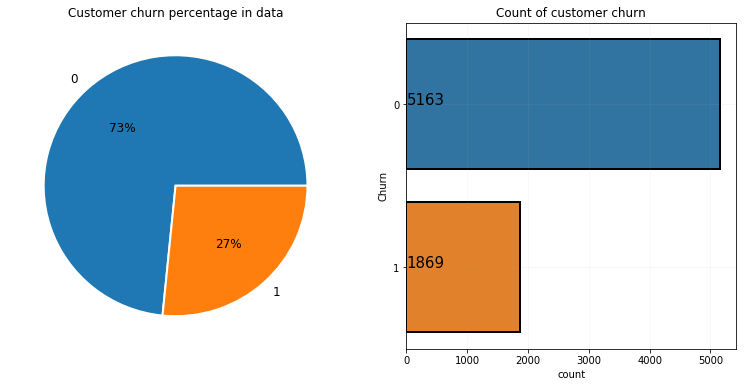

In [11]:
import seaborn as sns

# Creating a new dataframe for visualisation
churn_data_v = pd.read_csv(filepath)

# Dropping missing values first
churn_data_v = churn_data_v.drop(churn_data_v[churn_data_v['TotalCharges'] == " "].index)

plt.figure(figsize=(13,6))
plt.subplot(121)
churn_data["Churn"].value_counts().plot.pie(autopct  = "%1.0f%%",
                                        fontsize = 12,
                                        wedgeprops = {"linewidth" : 2,
                                                      "edgecolor" : "w"},
                                       )
plt.title("Customer churn percentage in data")
plt.ylabel("")

plt.subplot(122)
ax = sns.countplot(y = churn_data["Churn"],linewidth = 2,
                   edgecolor = "k"*churn_data["Churn"].nunique())
for i,j in enumerate(churn_data["Churn"].value_counts().values) : 
    ax.text(.1,i,j,fontsize = 15,color = "k")
plt.title("Count of customer churn")
plt.grid(True,alpha = .1)
    
plt.show()

### 1.6.2. Visualising categorical variables
Source: https://www.kaggle.com/bandiatindra/telecom-churn-prediction

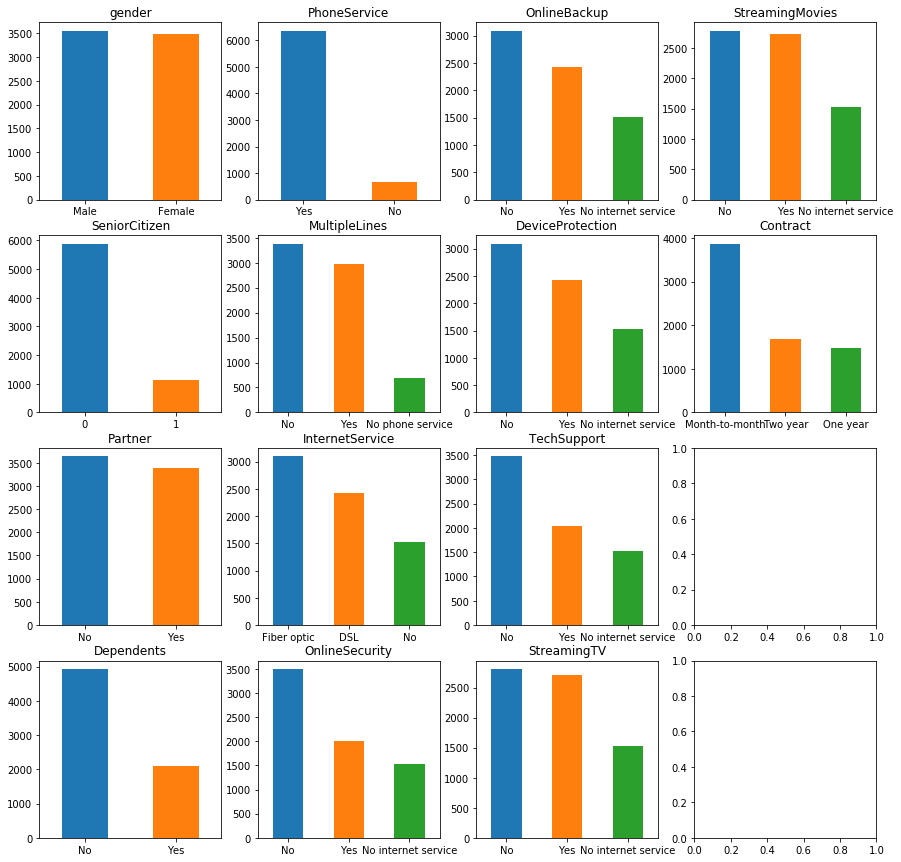

In [12]:
services = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
        'Contract']

fig, axes = plt.subplots(nrows = 4,ncols = 4,figsize = (15,15))
for i, item in enumerate(services):
    if i < 4:
        ax = churn_data_v[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=4 and i < 8:
        ax = churn_data_v[item].value_counts().plot(kind = 'bar',ax=axes[i-4,1],rot = 0)
        
    elif i >=8 and i < 12:
        ax = churn_data_v[item].value_counts().plot(kind = 'bar',ax=axes[i-8,2],rot = 0)
        
    elif i < 16:
        ax = churn_data_v[item].value_counts().plot(kind = 'bar',ax=axes[i-12,3],rot = 0)
    ax.set_title(item)

### 1.6.3. Visualising categorical variables with churn ratio
Source: https://www.kaggle.com/arunsankar/key-insights-from-telco-customer-churn

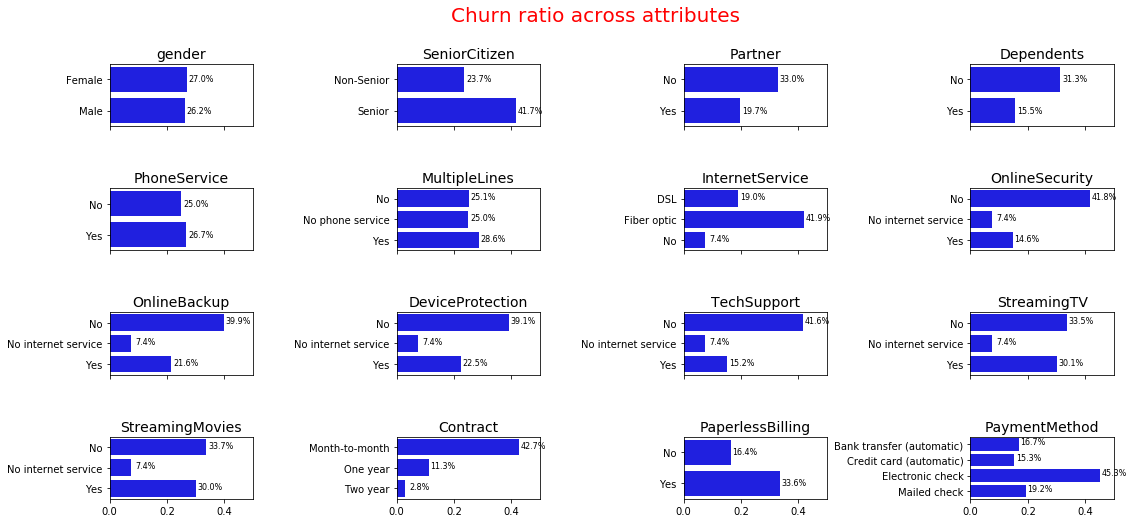

In [13]:
churn_data_v['SeniorCitizen'] = churn_data_v['SeniorCitizen'].apply(lambda x: "Senior" if x==1 else ("Non-Senior" if x==0 else x))

cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
        'Contract', 'PaperlessBilling', 'PaymentMethod']

fig, ax = plt.subplots(4,4,figsize=(18,8), sharex=True)

j=0
k=0
    
for i in cols:
    temp = churn_data_v.pivot_table(churn_data_v, index=[i], columns=['Churn'], aggfunc=len).reset_index()[[i,'tenure']]
    temp.columns=[i,'Churn_N','Churn_Y']
    temp['Churn_ratio']=(temp['Churn_Y'])/(temp['Churn_Y']+temp['Churn_N'])
    
    a = sns.barplot(x='Churn_ratio', y=i, data=temp, ax=ax[j][k], color="blue")
    a.set_yticklabels(labels=temp[i])
    for p in ax[j][k].patches:
        ax[j][k].text(p.get_width() + .05, p.get_y() + p.get_height()/1.5, '{:,.1%}'.format(p.get_width()),
                   fontsize=8, color='black', ha='center', va='bottom')
    ax[j][k].set_xlabel('', size=12, color="black")
    ax[j][k].set_ylabel('', size=12, color="black", rotation=0, horizontalalignment='right')
    ax[j][k].set_title(i, size=14, color="black")
    #print(j,k)
    if k==3: 
        j=j+1
        k=0
    else:
        k=k+1 
    
fig.suptitle("Churn ratio across attributes", fontsize=20, family='sans-serif', color="red")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=1, hspace=1)
plt.xlim(0,.5)
plt.show()

### 1.6.4. Visualising continuous variables with churn ratio
Source: https://www.kaggle.com/bandiatindra/telecom-churn-prediction

Text(0.5,1,'Distribution of monthly charges by churn')

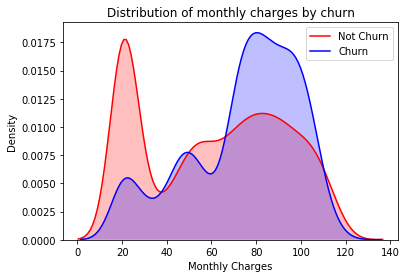

In [14]:
# Monthly Charges
ax = sns.kdeplot(churn_data_v.MonthlyCharges[(churn_data_v["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(churn_data_v.MonthlyCharges[(churn_data_v["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Text(0.5,1,'Distribution of total charges by churn')

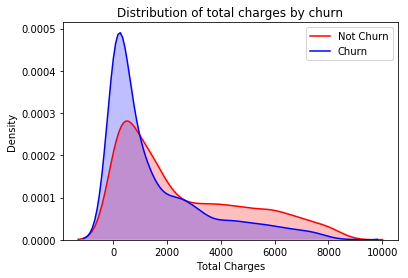

In [15]:
# Total Charges
ax = sns.kdeplot(churn_data_v.TotalCharges[(churn_data_v["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(churn_data_v.TotalCharges[(churn_data_v["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

Text(0.5,1,'Distribution of tenure by churn')

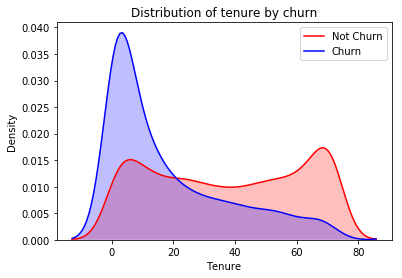

In [16]:
# Tenure
ax = sns.kdeplot(churn_data_v.tenure[(churn_data_v["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(churn_data_v.tenure[(churn_data_v["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Tenure')
ax.set_title('Distribution of tenure by churn')

### 1.6.5. Correlation of variables with output
Source: https://www.kaggle.com/bandiatindra/telecom-churn-prediction

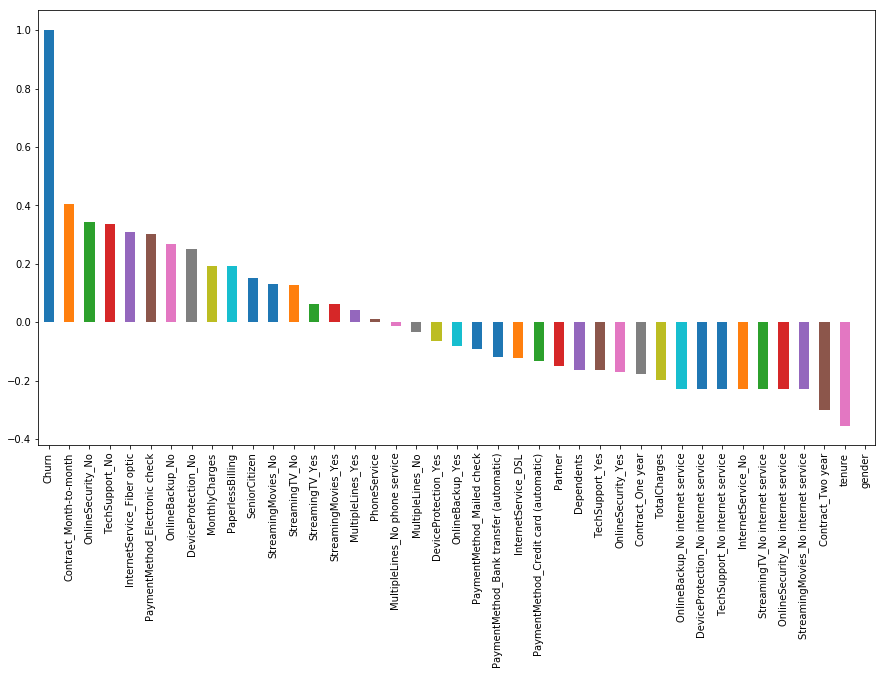

In [17]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
churn_data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

## 1.7. Storing all accuracy values
We will be creating a data frame to store all accuracies of our models

In [18]:
def model_summary(name,accuracy,sensitivity,precision,kfold,rocauc):
    results = pd.DataFrame({"Model"          : [name],
                           "Accuracy"        : [accuracy],
                           "Sensitivity"     : [sensitivity],
                           "Precision"       : [precision],
                           "k-fold"          : [kfold],
                           "Area_under_curve": [rocauc],
                          })
    return results

# 2. Decision tree classification

In [19]:
# Import libraries
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from math import sqrt, log
from __future__ import division
from collections import defaultdict
%matplotlib inline

## 2.1. Decision tree with entropy as criterion

### 2.1.1. Baseline model (Decision tree - entropy) with all features

In [20]:
# Fit the model on train data
decision_tree_entropy = DecisionTreeClassifier(criterion='entropy')
decision_tree_model_entropy = decision_tree_entropy.fit(X_train, y_train)

# Get predicted labels for test data. This is to be compared later on to build our confusion matrix
y_pred = decision_tree_model_entropy.predict(X_test)

### 2.1.2. Evaluation of baseline model (Decision tree - entropy) with confusion matrix

[[1263  270]
 [ 290  287]]
TN: 1263 FP: 270 FN: 290 TP: 287
Accuracy:  0.7345971563981043
Sensitivity:  0.49740034662045063
Precision:  0.5152603231597845


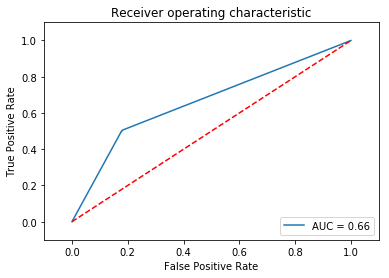

Area under curve:  0.662514795809352


In [21]:
# Create confusion matrix
cm_entropy = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm_entropy.ravel()
print(cm_entropy)
print ("TN: " + str(TN),"FP: " + str(FP), "FN: " + str(FN), "TP: " + str(TP))

# Performance of decision tree model
print ("Accuracy: ", accuracy_score(y_test, y_pred))
print ("Sensitivity: ", recall_score(y_test, y_pred))
print ("Precision: ", precision_score(y_test, y_pred))

# ROC and AUC
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Get predicted scores Pr(y=1): Used as thresholds for calculating TP Rate and FP Rate
score = decision_tree_model_entropy.predict_proba(X_test)[:, 1]

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, score) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Receiver operating characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print ("Area under curve: ", roc_auc_score(y_test,score))

### 2.1.3. Evaluation of baseline model (Decision tree - entropy) with K-fold validation
Choice of number of folds: 10 (explained in write up)

In [22]:
from sklearn.model_selection import KFold, cross_val_score

# 10-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=12345)

# Cross validation on baseline model
cv = cross_val_score(decision_tree_entropy, # baseline model
                    train_feature, # Feature matrix
                    train_target, # Output vector
                    cv=kf, # Cross-validation technique
                    scoring='accuracy' # Model performance metrics: accuracy
                    )

# Report performance of baseline model
print("Baseline decision tree entropy k-fold accuracy: %s" %(cv.mean()))

model1 = model_summary("Decision tree baseline entropy",accuracy_score(y_test, y_pred),recall_score(y_test, y_pred),
              precision_score(y_test, y_pred),cv.mean(),roc_auc_score(y_test,score))

Baseline decision tree entropy k-fold accuracy: 0.7408993922151818


### 2.1.4. Improved model (Decision tree - entropy) with feature selection

In [23]:
# Feature list adapted from 1.5 Determining Important Features
feat_list = ['MonthlyCharges','TotalCharges','Contract_Month-to-month','tenure','InternetService_Fiber optic',
             'Partner','PaperlessBilling','TechSupport_No','PaymentMethod_Electronic check','Dependents','SeniorCitizen',
             'PaymentMethod_Mailed check','OnlineSecurity_Yes','DeviceProtection_Yes','MultipleLines_No','OnlineBackup_No',
             'PaymentMethod_Bank transfer (automatic)','MultipleLines_Yes','TechSupport_Yes','StreamingMovies_Yes',
             'DeviceProtection_No','StreamingTV_Yes','OnlineBackup_Yes','PaymentMethod_Credit card (automatic)',
             'OnlineSecurity_No','PhoneService','StreamingMovies_No','StreamingTV_No','Contract_Two year',
             'OnlineBackup_No internet service','MultipleLines_No phone service','Contract_One year',
             'OnlineSecurity_No internet service','InternetService_DSL','StreamingMovies_No internet service',
             'StreamingTV_No internet service','TechSupport_No internet service','InternetService_No',
             'DeviceProtection_No internet service','gender']

N_features = range(2, 41) # from 1 to 40 predictors
accuracy_list_cm = [] # A list of confusion matrix accuracy for 1 to 40 top fatures selected
sensitivity_list_cm = [] # A list of confusion matrix sensitivity for 1 to 40 top fatures selected
precision_list_cm = [] # A list of confusion matrix precision for 1 to 40 top fatures selected
auc_list = [] # A list of area under curve for roc for 1 to 40 top fatures selected
accuracy_list_kf = [] # A list of k-fold accuracy for 1 to 40 top fatures selected

best_k = 0
best_acc = 0
best_sensi = 0
best_precision = 0
best_auc = 0
best_kf = 0

for k in N_features:
    # Split train test data based on feature list
    train_feature_temp = churn_data.loc[:,feat_list[:k]]
    train_target_temp = churn_data.iloc[:,40]

    X_train, X_test, y_train, y_test = train_test_split(train_feature_temp,
                                                                    train_target_temp, test_size=0.3, random_state=12345)

    # Fit the model on train data
    decision_tree_entropy = DecisionTreeClassifier(criterion='entropy')
    decision_tree_model_entropy = decision_tree_entropy.fit(X_train, y_train) # Fit categorcal data

    # Get predicted labels for test data. This is to be compared later on to build our confusion matrix
    y_pred = decision_tree_model_entropy.predict(X_test)
    
    # List of scores
    acc = accuracy_score(y_test, y_pred)
    sensi = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    # Append to score list
    accuracy_list_cm.append(acc)
    sensitivity_list_cm.append(sensi)
    precision_list_cm.append(precision)
    auc_list.append(auc)
    
    # 10-Fold Cross Validation
    kf = KFold(n_splits=10, shuffle=True, random_state=12345)

    # Cross validation on baseline model
    cv = cross_val_score(decision_tree_entropy, # baseline model
                        train_feature_temp, # Feature matrix
                        train_target_temp, # Output vector
                        cv=kf, # Cross-validation technique
                        scoring='accuracy' # Model performance metrics: accuracy
                        )
    
    kf_score = cv.mean()
    
    accuracy_list_kf.append(kf_score)
    
    if (acc > best_acc):
        best_k = k
        best_acc = acc
        best_sensi = sensi
        best_precision = precision
        best_auc = auc
        best_kf = kf_score

### 2.1.5. Evaluation of improved model (Decision tree - entropy) with CM and K-fold

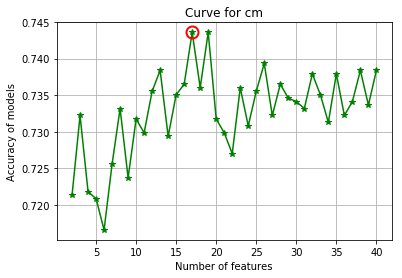

Highest accuracy of entropy model with 17 features selected: 0.7436018957345971


In [24]:
# Graph for CM
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(N_features, accuracy_list_cm, 'g*-')
ax.plot(N_features[15], accuracy_list_cm[15], marker='o', markersize=12, markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of features')
plt.ylabel('Accuracy of models')
plt.title('Curve for cm')

plt.show()

print("Highest accuracy of entropy model with 17 features selected: " + str(accuracy_list_cm[15]))

model2 = model_summary("Decision tree improved entropy",best_acc,best_sensi,best_precision,best_kf,best_auc)

## 2.2. Decision tree with gini as criterion

### 2.2.1. Baseline model (Decision tree - gini) with all features

In [25]:
# Fit the model on train data
decision_tree_gini = DecisionTreeClassifier(criterion='gini')
decision_tree_model_gini = decision_tree_gini.fit(X_train, y_train)

# Get predicted labels for test data. This is to be compared later on to build our confusion matrix
y_pred = decision_tree_model_gini.predict(X_test)

### 2.2.2. Evaluation of baseline model (Decision tree - gini) with confusion matrix

[[1250  283]
 [ 287  290]]
TN: 1250 FP: 283 FN: 287 TP: 290
Accuracy:  0.7298578199052133
Sensitivity:  0.5025996533795494
Precision:  0.506108202443281


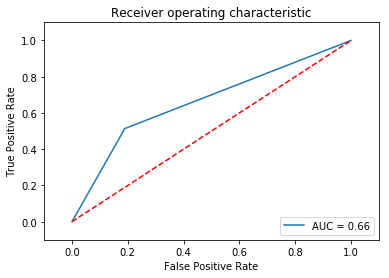

Area under curve:  0.6622604265941319


In [26]:
# Create confusion matrix
cm_gini = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm_gini.ravel()
print(cm_gini)
print ("TN: " + str(TN),"FP: " + str(FP), "FN: " + str(FN), "TP: " + str(TP))

# Performance of decision tree model
print ("Accuracy: ", accuracy_score(y_test, y_pred))
print ("Sensitivity: ", recall_score(y_test, y_pred))
print ("Precision: ", precision_score(y_test, y_pred))

# ROC and AUC
from sklearn.metrics import roc_curve, auc

# Get predicted scores Pr(y=1): Used as thresholds for calculating TP Rate and FP Rate
score = decision_tree_model_gini.predict_proba(X_test)[:, 1]

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, score) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Receiver operating characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print ("Area under curve: ", roc_auc_score(y_test,score))

### 2.2.3 Evaluation of model (Decision tree - gini) with K-Fold validation

In [27]:
from sklearn.model_selection import KFold, cross_val_score

# 10-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=12345)

# Cross validation on baseline model (gini)
cv = cross_val_score(decision_tree_gini, # baseline model (gini)
                    train_feature, # Feature matrix
                    train_target, # Output vector
                    cv=kf, # Cross-validation technique
                    scoring='accuracy' # Model performance metrics: accuracy
                    )

# Report performance of Model 3
print("Baseline decision tree gini k-fold accuracy: %s" %(cv.mean()))

model3 = model_summary("Decision tree baseline gini",accuracy_score(y_test, y_pred),recall_score(y_test, y_pred),
              precision_score(y_test, y_pred),cv.mean(),roc_auc_score(y_test,score))

Baseline decision tree gini k-fold accuracy: 0.7362060325876115


### 2.2.4. Improved model (Decision tree - gini) with feature selection

In [28]:
# Feature list adapted from 1.5 Determining Important Features
feat_list = ['MonthlyCharges','TotalCharges','Contract_Month-to-month','tenure','InternetService_Fiber optic',
             'Partner','PaperlessBilling','TechSupport_No','PaymentMethod_Electronic check','Dependents','SeniorCitizen',
             'PaymentMethod_Mailed check','OnlineSecurity_Yes','DeviceProtection_Yes','MultipleLines_No','OnlineBackup_No',
             'PaymentMethod_Bank transfer (automatic)','MultipleLines_Yes','TechSupport_Yes','StreamingMovies_Yes',
             'DeviceProtection_No','StreamingTV_Yes','OnlineBackup_Yes','PaymentMethod_Credit card (automatic)',
             'OnlineSecurity_No','PhoneService','StreamingMovies_No','StreamingTV_No','Contract_Two year',
             'OnlineBackup_No internet service','MultipleLines_No phone service','Contract_One year',
             'OnlineSecurity_No internet service','InternetService_DSL','StreamingMovies_No internet service',
             'StreamingTV_No internet service','TechSupport_No internet service','InternetService_No',
             'DeviceProtection_No internet service','gender']

N_features = range(2, 41) # from 1 to 40 predictors
accuracy_list_cm = [] # A list of confusion matrix accuracy for 1 to 40 top fatures selected
sensitivity_list_cm = [] # A list of confusion matrix sensitivity for 1 to 40 top fatures selected
precision_list_cm = [] # A list of confusion matrix precision for 1 to 40 top fatures selected
auc_list = [] # A list of area under curve for roc for 1 to 40 top fatures selected
accuracy_list_kf = [] # A list of k-fold accuracy for 1 to 40 top fatures selected

best_k = 0
best_acc = 0
best_sensi = 0
best_precision = 0
best_auc = 0
best_kf = 0

for k in N_features:
    # Split train test data based on feature list
    train_feature_temp = churn_data.loc[:,feat_list[:k]]
    train_target_temp = churn_data.iloc[:,40]

    X_train, X_test, y_train, y_test = train_test_split(train_feature_temp,
                                                                    train_target_temp, test_size=0.3, random_state=12345)

    # Fit the model on train data
    decision_tree_gini = DecisionTreeClassifier(criterion='gini')
    decision_tree_model_gini = decision_tree_gini.fit(X_train, y_train) # Fit categorcal data

    # Get predicted labels for test data. This is to be compared later on to build our confusion matrix
    y_pred = decision_tree_model_gini.predict(X_test)
    
    # List of scores
    acc = accuracy_score(y_test, y_pred)
    sensi = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    # Append to score list
    accuracy_list_cm.append(acc)
    sensitivity_list_cm.append(sensi)
    precision_list_cm.append(precision)
    auc_list.append(auc)
    
    # 10-Fold Cross Validation
    kf = KFold(n_splits=10, shuffle=True, random_state=12345)

    # Cross validation on baseline model
    cv = cross_val_score(decision_tree_gini, # baseline model
                        train_feature_temp, # Feature matrix
                        train_target_temp, # Output vector
                        cv=kf, # Cross-validation technique
                        scoring='accuracy' # Model performance metrics: accuracy
                        )
    
    kf_score = cv.mean()
    
    accuracy_list_kf.append(kf_score)
    
    if (acc > best_acc):
        best_k = k
        best_acc = acc
        best_sensi = sensi
        best_precision = precision
        best_auc = auc
        best_kf = kf_score

### 2.2.5. Evaluation of improved model (Decision tree - gini) with CM and K-fold

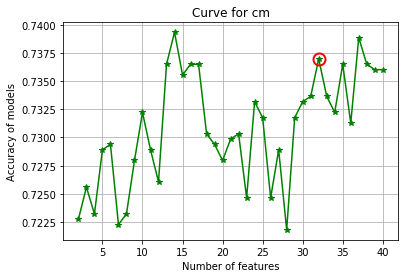

Highest accuracy of gini model with 32 features selected: 0.7369668246445498


In [29]:
# Graph for CM
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(N_features, accuracy_list_cm, 'g*-')
ax.plot(N_features[30], accuracy_list_cm[30], marker='o', markersize=12, markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of features')
plt.ylabel('Accuracy of models')
plt.title('Curve for cm')

plt.show()

print("Highest accuracy of gini model with 32 features selected: " + str(accuracy_list_cm[30]))

model4 = model_summary("Decision tree improved gini",best_acc,best_sensi,best_precision,best_kf,best_auc)

# 3.Logistic regression
Linear regression will not be explored. This is due to the fact that the dependent variable is categorical ("Yes", "No")
Thus, we will be using logistic regression instead to model our data

In [30]:
from sklearn.linear_model import LogisticRegression

## 3.1. Logistic regression with lasso regularization

In [31]:
# Fit the model on train data: Using L1-regularization
lr1 = LogisticRegression(fit_intercept=True, max_iter=1000, tol=2e-9, penalty='l1', C=100, random_state=0)
lr1.fit(X=X_train, y=y_train)

# Get coefficients
print (lr1.intercept_, lr1.coef_)

# Predict outputs for test data
y_pred = lr1.predict(X_test)

[0.] [[-2.80191255e-02  2.86996226e-04  6.67951244e-01 -5.62429617e-02
   1.16471712e+00 -2.64674771e-02  3.23617962e-01  3.55538238e-01
   2.72204060e-01 -7.58546039e-02  1.66931478e-01 -6.71557786e-02
   0.00000000e+00  3.86596692e-02 -1.74618282e-01  2.51456485e-02
   0.00000000e+00  2.18919455e-01  0.00000000e+00  5.58027781e-01
   0.00000000e+00  4.36367483e-01  0.00000000e+00 -2.11935282e-01
   1.95832918e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -7.21237276e-01 -6.84925739e-06  0.00000000e+00  0.00000000e+00
  -1.54777293e-06 -2.88557615e-01 -8.17811748e-01 -9.03507404e-07
  -1.61475760e-06 -5.83763081e-02 -3.91037019e-01  0.00000000e+00]]


### 3.1.1.Evaluation of model (Logistic - l1) with confusion matrix

[[1377  156]
 [ 253  324]]
TN: 1377 FP: 156 FN: 253 TP: 324
Accuracy:  0.8061611374407583
Sensitivity:  0.561525129982669
Precision:  0.675


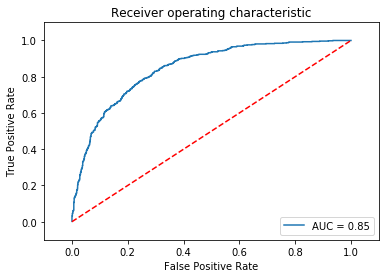

Area under curve:  0.8466470180579532


In [32]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
cm_l1 = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm_l1.ravel()
print (cm_l1)
print ("TN: " + str(TN),"FP: " + str(FP), "FN: " + str(FN), "TP: " + str(TP))

# Performance of decision tree model
print ("Accuracy: ", accuracy_score(y_test, y_pred))
print ("Sensitivity: ", recall_score(y_test, y_pred))
print ("Precision: ", precision_score(y_test, y_pred))

# ROC and AUC
from sklearn.metrics import roc_curve, auc

# Get predicted scores Pr(y=1): Used as thresholds for calculating TP Rate and FP Rate
# lr.classes_
score = lr1.predict_proba(X_test)[:, 1]

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, score) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Receiver operating characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print ("Area under curve: ", roc_auc_score(y_test,score))

### 3.1.2. Evaluation of model (Logistic - l1) with K-fold validation

In [33]:
# Deciding the number of folds to use
from sklearn.model_selection import KFold, cross_val_score
# 10-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=12345)

# Cross validation on logistics model with l1 penalty
cv_lr1 = cross_val_score(lr1, # logistics model with l1 penalty
                         train_feature, # Feature matrix
                         train_target, # Output vector
                         cv=kf, # Cross-validation technique
                         scoring='accuracy' # Model performance metrics: accuracy
                        )

# Report performance of model lr1
print("Baseline logistic l1 k-fold accuracy: %s" %(cv_lr1.mean()))

model5 = model_summary("Logistic regression l1",accuracy_score(y_test, y_pred),recall_score(y_test, y_pred),
              precision_score(y_test, y_pred),cv_lr1.mean(),roc_auc_score(y_test,score))

Baseline logistic l1 k-fold accuracy: 0.8054599605586448


## 3.2. Logistic regression with ridge regularization

In [34]:
# Fit the model on train data: Using L2-regularization
lr2 = LogisticRegression(fit_intercept=True, max_iter=1000, tol=2e-9, penalty='l2', C=100, random_state=0)
lr2.fit(X=X_train, y=y_train)

# Predict outputs for test data
y_pred = lr2.predict(X_test)

### 3.2.1. Evaluation of model (Logistic - l2) with confusion matrix

[[1377  156]
 [ 253  324]]
TN: 1377 FP: 156 FN: 253 TP: 324
Accuracy:  0.8061611374407583
Sensitivity:  0.561525129982669
Precision:  0.675


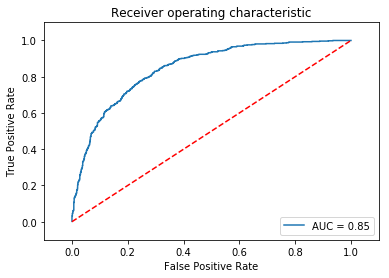

Area under curve:  0.8466391043490353


In [35]:
cm_l2 = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm_l2.ravel()
print (cm_l2)
print ("TN: " + str(TN),"FP: " + str(FP), "FN: " + str(FN), "TP: " + str(TP))

# Performance of decision tree model
print ("Accuracy: ", accuracy_score(y_test, y_pred))
print ("Sensitivity: ", recall_score(y_test, y_pred))
print ("Precision: ", precision_score(y_test, y_pred))

# ROC and AUC
from sklearn.metrics import roc_curve, auc

# Get predicted scores Pr(y=1): Used as thresholds for calculating TP Rate and FP Rate
# lr.classes_
score = lr2.predict_proba(X_test)[:, 1]

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, score) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Receiver operating characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print ("Area under curve: ", roc_auc_score(y_test,score))

### 3.2.2. Evaluation of model (Logistic - l2) with K-fold validation

In [36]:
# Deciding the number of folds to use
from sklearn.model_selection import KFold, cross_val_score

# 10-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=12345)

# Cross validation on logistics model with l2 penalty
cv_lr2 = cross_val_score(lr2, # logistics model with l2 penalty
                         train_feature, # Feature matrix
                         train_target, # Output vector
                         cv=kf, # Cross-validation technique
                         scoring='accuracy' # Model performance metrics: accuracy
                        )

# Report performance of model lr2
print("Baseline logistic l2 k-fold accuracy: %s" %(cv_lr2.mean()))

model6 = model_summary("Logistic regression l2",accuracy_score(y_test, y_pred),recall_score(y_test, y_pred),
              precision_score(y_test, y_pred),cv_lr2.mean(),roc_auc_score(y_test,score))

Baseline logistic l2 k-fold accuracy: 0.8054599605586448


# 4.Ensemble learning

## 4.1. Bagging

In [37]:
# Bootstrap Aggregating Package
from sklearn.ensemble import BaggingClassifier

# Fit Bagging Model; A bundle of decision trees
BA = BaggingClassifier(n_estimators=100, random_state=12345)
BA_model = BA.fit(X_train, y_train)
print(BA_model.classes_)

# Validation
y_pred = BA_model.predict(X_test)

[0 1]


### 4.1.1. Evaluation of model (Bagging) with confusion matrix

[[1376  157]
 [ 278  299]]
TN: 1376 FP: 157 FN: 278 TP: 299
Accuracy:  0.7938388625592417
Sensitivity:  0.5181975736568457
Precision:  0.6557017543859649


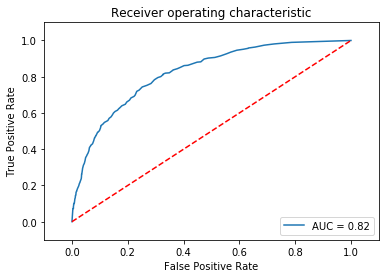

Area under curve:  0.8216832232762529


In [38]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print(cm)
print ("TN: " + str(TN),"FP: " + str(FP), "FN: " + str(FN), "TP: " + str(TP))

# Performance of decision tree model
print ("Accuracy: ", accuracy_score(y_test, y_pred))
print ("Sensitivity: ", recall_score(y_test, y_pred))
print ("Precision: ", precision_score(y_test, y_pred))

# ROC and AUC
from sklearn.metrics import roc_curve, auc

# Get predicted scores Pr(y=1): Used as thresholds for calculating TP Rate and FP Rate
score = BA_model.predict_proba(X_test)[:, 1]

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, score) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Receiver operating characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print ("Area under curve: ", roc_auc_score(y_test,score))

### 4.1.2. Evaluation of model (Bagging) with K-fold validation

In [39]:
# 10-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=12345)

# Cross validation on bagging model
cv_BA = cross_val_score(BA, # BA model
                        train_feature, # Feature matrix
                        train_target, # Output vector
                        cv=kf, # Cross-validation technique
                        scoring='accuracy' # Model performance metrics: accuracy
                        )

# Report performance of bagging model
print("Bagging k-fold accuracy: %s" %(cv_BA.mean()))

model7 = model_summary("Bagging",accuracy_score(y_test, y_pred),recall_score(y_test, y_pred),
              precision_score(y_test, y_pred),cv_BA.mean(),roc_auc_score(y_test,score))

Bagging k-fold accuracy: 0.78256356685633


## 4.2. Random forest using Entropy

### 4.2.1. Baseline model (Random Forest Entropy) with all features

In [40]:
# Random Forest package
from sklearn.ensemble import RandomForestClassifier

# Fit Random Forest Model; Binary Splitting using Entropy
RF = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=12345)
RF_model = RF.fit(X_train, y_train)
print(RF_model.classes_)

# Validation
y_pred = RF_model.predict(X_test)

[0 1]


### 4.2.2. Evaluation of baseline model (Random Forest Entropy) with confusion matrix

[[1386  147]
 [ 292  285]]
TN: 1386 FP: 147 FN: 292 TP: 285
Accuracy:  0.7919431279620853
Sensitivity:  0.49393414211438474
Precision:  0.6597222222222222


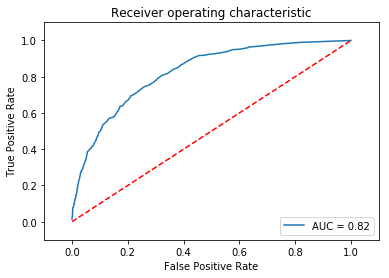

Area under curve:  0.8246316451131153


In [41]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print(cm)
print ("TN: " + str(TN),"FP: " + str(FP), "FN: " + str(FN), "TP: " + str(TP))

# Performance of decision tree model
print ("Accuracy: ", accuracy_score(y_test, y_pred))
print ("Sensitivity: ", recall_score(y_test, y_pred))
print ("Precision: ", precision_score(y_test, y_pred))

# ROC and AUC
from sklearn.metrics import roc_curve, auc

# Get predicted scores Pr(y=1): Used as thresholds for calculating TP Rate and FP Rate
score = RF_model.predict_proba(X_test)[:, 1]

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, score) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Receiver operating characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print ("Area under curve: ", roc_auc_score(y_test,score))

### 4.2.3. Evaluation of baseline model (Random Forest Entropy) with K-fold validation

In [42]:
# 10-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=12345)

# Cross validation on random forest model using entropy criterion
cv_forest_entropy = cross_val_score(RF, # Model RF
                                    train_feature, # Feature matrix
                                    train_target, # Output vector
                                    cv=kf, # Cross-validation technique
                                    scoring='accuracy' # Model performance metrics: accuracy
                                    )

# Report performance of random forest entropy
print("Random Forest(entropy) k-fold accuracy: %s" %(cv_forest_entropy.mean()))

model8 = model_summary("Random forest baseline entropy",accuracy_score(y_test, y_pred),recall_score(y_test, y_pred),
              precision_score(y_test, y_pred),cv_forest_entropy.mean(),roc_auc_score(y_test,score))

Random Forest(entropy) k-fold accuracy: 0.7851222035432561


### 4.2.4. Improved model model (Random Forest Entropy) with features selection

In [57]:
# Feature list adapted from 1.5 Determining Important Features
feat_list = ['TotalCharges','tenure','MonthlyCharges','Contract_Month-to-month','InternetService_Fiber optic',
             'PaperlessBilling','TechSupport_No','Partner','SeniorCitizen','Contract_Two year','Dependents',
             'PaymentMethod_Electronic check','OnlineSecurity_No','MultipleLines_No','OnlineBackup_Yes',
             'OnlineBackup_No','DeviceProtection_No','Contract_One year','TechSupport_Yes',
             'PaymentMethod_Credit card (automatic)','OnlineSecurity_Yes','MultipleLines_Yes','StreamingTV_No',
             'PaymentMethod_Bank transfer (automatic)','StreamingMovies_Yes','PaymentMethod_Mailed check','StreamingTV_Yes',
             'InternetService_DSL','OnlineBackup_No internet service','DeviceProtection_Yes','StreamingMovies_No',
             'DeviceProtection_No internet service','StreamingMovies_No internet service','OnlineSecurity_No internet service',
             'StreamingTV_No internet service','MultipleLines_No phone service','PhoneService','TechSupport_No internet service',
             'InternetService_No','gender']

N_features = range(2, 41) # from 1 to 40 predictors
accuracy_list_cm = [] # A list of confusion matrix accuracy for 1 to 40 top fatures selected
sensitivity_list_cm = [] # A list of confusion matrix sensitivity for 1 to 40 top fatures selected
precision_list_cm = [] # A list of confusion matrix precision for 1 to 40 top fatures selected
auc_list = [] # A list of area under curve for roc for 1 to 40 top fatures selected
accuracy_list_kf = [] # A list of k-fold accuracy for 1 to 40 top fatures selected

best_k = 0
best_acc = 0
best_sensi = 0
best_precision = 0
best_auc = 0
best_kf = 0

for k in N_features:
    # Split train test data based on feature list
    train_feature_temp = churn_data.loc[:,feat_list[:k]]
    train_target_temp = churn_data.iloc[:,40]

    X_train, X_test, y_train, y_test = train_test_split(train_feature_temp,
                                                                    train_target_temp, test_size=0.3, random_state=12345)

    # Fit Random Forest Model; Binary Splitting using Entropy
    RF = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=12345)
    RF_model = RF.fit(X_train, y_train)

    # Get predicted labels for test data. This is to be compared later on to build our confusion matrix
    y_pred = RF_model.predict(X_test)


    
    # List of scores
    acc = accuracy_score(y_test, y_pred)
    sensi = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    # Append to score list
    accuracy_list_cm.append(acc)
    sensitivity_list_cm.append(sensi)
    precision_list_cm.append(precision)
    auc_list.append(auc)
    
    # 10-Fold Cross Validation
    kf = KFold(n_splits=10, shuffle=True, random_state=12345)

    # Cross validation on baseline model
    cv = cross_val_score(RF, # baseline model
                        train_feature_temp, # Feature matrix
                        train_target_temp, # Output vector
                        cv=kf, # Cross-validation technique
                        scoring='accuracy' # Model performance metrics: accuracy
                        )
    
    kf_score = cv.mean()
    
    accuracy_list_kf.append(kf_score)
    
    if (acc > best_acc):
        best_k = k
        best_acc = acc
        best_sensi = sensi
        best_precision = precision
        best_auc = auc
        best_kf = kf_score

### 4.2.5. Evaluation of improved model (Decision tree - entropy) with CM and K-fold

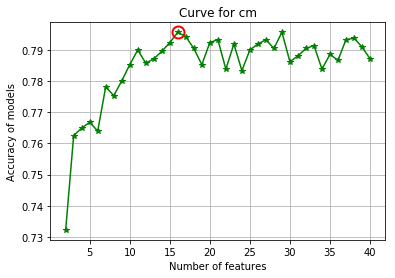

Highest accuracy of entropy model with 16 features selected: 0.795734597156398


In [58]:
# Graph for CM
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(N_features, accuracy_list_cm, 'g*-')
ax.plot(N_features[14], accuracy_list_cm[14], marker='o', markersize=12, markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of features')
plt.ylabel('Accuracy of models')
plt.title('Curve for cm')

plt.show()

print("Highest accuracy of entropy model with 16 features selected: " + str(accuracy_list_cm[14]))

model9 = model_summary("Random forest improved entropy",best_acc,best_sensi,best_precision,best_kf,best_auc)

## 4.3. Random forest using Gini

### 4.3.1. Baseline model (Random Forest Gini) with all features

In [59]:
# Random Forest package
from sklearn.ensemble import RandomForestClassifier

# Fit Random Forest Model; Binary Splitting using Entropy
RF = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=12345)
RF_model = RF.fit(X_train, y_train)
print(RF_model.classes_)

[0 1]


### 4.3.2. Evaluation of baseline model (Random Forest Gini) with confusion matrix

[[1384  149]
 [ 298  279]]
TN: 1384 FP: 149 FN: 298 TP: 279
Accuracy:  0.7881516587677725
Sensitivity:  0.48353552859618715
Precision:  0.6518691588785047


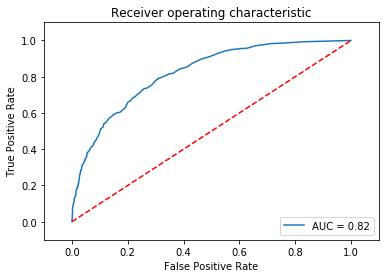

Area under curve:  0.8208070626460504


In [60]:
# Validation
y_pred = RF_model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print(cm)
print ("TN: " + str(TN),"FP: " + str(FP), "FN: " + str(FN), "TP: " + str(TP))

# Performance of decision tree model
print ("Accuracy: ", accuracy_score(y_test, y_pred))
print ("Sensitivity: ", recall_score(y_test, y_pred))
print ("Precision: ", precision_score(y_test, y_pred))

# ROC and AUC
from sklearn.metrics import roc_curve, auc

# Get predicted scores Pr(y=1): Used as thresholds for calculating TP Rate and FP Rate
score = RF_model.predict_proba(X_test)[:, 1]

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, score) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Receiver operating characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print ("Area under curve: ", roc_auc_score(y_test,score))

### 4.3.3. Evaluation of baseline model (Random Forest Gini) with K-fold validation

In [61]:
# 10-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=12345)

# Cross validation on random forest model using gini criterion
cv_forest_gini = cross_val_score(RF, # Model RF
                                 train_feature, # Feature matrix
                                 train_target, # Output vector
                                 cv=kf, # Cross-validation technique
                                 scoring='accuracy' # Model performance metrics: accuracy
                                )

# Report performance of random forest gini
print("Random Forest(gini) k-fold accuracy: %s" %(cv_forest_gini.mean()))

model10 = model_summary("Random forest baseline gini",accuracy_score(y_test, y_pred),recall_score(y_test, y_pred),
              precision_score(y_test, y_pred),cv_forest_gini.mean(),roc_auc_score(y_test,score))

Random Forest(gini) k-fold accuracy: 0.7854095273503168


### 4.2.4. Improved model model (Random Forest Gini) with features selection

In [62]:
# Feature list adapted from 1.5 Determining Important Features
feat_list = ['TotalCharges','tenure','MonthlyCharges','Contract_Month-to-month','InternetService_Fiber optic',
             'PaperlessBilling','TechSupport_No','Partner','SeniorCitizen','Contract_Two year','Dependents',
             'PaymentMethod_Electronic check','OnlineSecurity_No','MultipleLines_No','OnlineBackup_Yes',
             'OnlineBackup_No','DeviceProtection_No','Contract_One year','TechSupport_Yes',
             'PaymentMethod_Credit card (automatic)','OnlineSecurity_Yes','MultipleLines_Yes','StreamingTV_No',
             'PaymentMethod_Bank transfer (automatic)','StreamingMovies_Yes','PaymentMethod_Mailed check','StreamingTV_Yes',
             'InternetService_DSL','OnlineBackup_No internet service','DeviceProtection_Yes','StreamingMovies_No',
             'DeviceProtection_No internet service','StreamingMovies_No internet service','OnlineSecurity_No internet service',
             'StreamingTV_No internet service','MultipleLines_No phone service','PhoneService','TechSupport_No internet service',
             'InternetService_No','gender']

N_features = range(2, 41) # from 1 to 40 predictors
accuracy_list_cm = [] # A list of confusion matrix accuracy for 1 to 40 top fatures selected
sensitivity_list_cm = [] # A list of confusion matrix sensitivity for 1 to 40 top fatures selected
precision_list_cm = [] # A list of confusion matrix precision for 1 to 40 top fatures selected
auc_list = [] # A list of area under curve for roc for 1 to 40 top fatures selected
accuracy_list_kf = [] # A list of k-fold accuracy for 1 to 40 top fatures selected

best_k = 0
best_acc = 0
best_sensi = 0
best_precision = 0
best_auc = 0
best_kf = 0

for k in N_features:
    # Split train test data based on feature list
    train_feature_temp = churn_data.loc[:,feat_list[:k]]
    train_target_temp = churn_data.iloc[:,40]

    X_train, X_test, y_train, y_test = train_test_split(train_feature_temp,
                                                                    train_target_temp, test_size=0.3, random_state=12345)

    # Fit Random Forest Model; Binary Splitting using gini
    RF = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=12345)
    RF_model = RF.fit(X_train, y_train)

    # Get predicted labels for test data. This is to be compared later on to build our confusion matrix
    y_pred = RF_model.predict(X_test)
    
    # List of scores
    acc = accuracy_score(y_test, y_pred)
    sensi = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    # Append to score list
    accuracy_list_cm.append(acc)
    sensitivity_list_cm.append(sensi)
    precision_list_cm.append(precision)
    auc_list.append(auc)
    
    # 10-Fold Cross Validation
    kf = KFold(n_splits=10, shuffle=True, random_state=12345)

    # Cross validation on baseline model
    cv = cross_val_score(RF, # baseline model
                        train_feature_temp, # Feature matrix
                        train_target_temp, # Output vector
                        cv=kf, # Cross-validation technique
                        scoring='accuracy' # Model performance metrics: accuracy
                        )
    
    kf_score = cv.mean()
    
    accuracy_list_kf.append(kf_score)
    
    if (acc > best_acc):
        best_k = k
        best_acc = acc
        best_sensi = sensi
        best_precision = precision
        best_auc = auc
        best_kf = kf_score

### 4.2.5. Evaluation of improved model (Random Forest Gini) with CM and K-fold

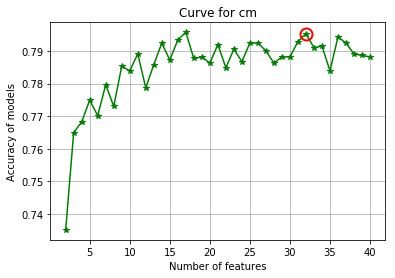

Highest accuracy of entropy model with 32 features selected: 0.795260663507109


In [64]:
# Graph for CM
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(N_features, accuracy_list_cm, 'g*-')
ax.plot(N_features[30], accuracy_list_cm[30], marker='o', markersize=12, markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of features')
plt.ylabel('Accuracy of models')
plt.title('Curve for cm')

plt.show()

print("Highest accuracy of entropy model with 32 features selected: " + str(accuracy_list_cm[30]))

model11 = model_summary("Random forest improved gini",best_acc,best_sensi,best_precision,best_kf,best_auc)

## 4.4. Adaboost

### 4.4.1. Baseline model (Adaboost) with all features

In [50]:
# AdaBoost package
from sklearn.ensemble import AdaBoostClassifier

# Fit Adaboosting Model
Ada = AdaBoostClassifier(n_estimators=100, random_state=12345)
Ada_model = Ada.fit(X_train, y_train)
Ada_model.classes_

# Validation
y_pred = Ada_model.predict(X_test)

### 4.4.2. Evaluation of baseline model (Adaboost) with confusion matrix

[[1396  137]
 [ 272  305]]
TN: 1396 FP: 137 FN: 272 TP: 305
Accuracy:  0.8061611374407583
Sensitivity:  0.5285961871750433
Precision:  0.6900452488687783


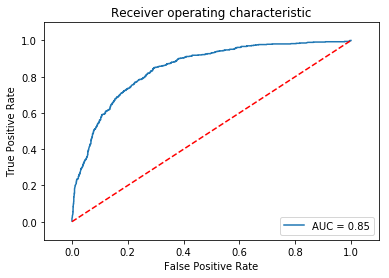

Area under curve:  0.8479471273801893


In [51]:
# Validation
y_pred = Ada_model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print(cm)
print ("TN: " + str(TN),"FP: " + str(FP), "FN: " + str(FN), "TP: " + str(TP))

# Performance of decision tree model
print ("Accuracy: ", accuracy_score(y_test, y_pred))
print ("Sensitivity: ", recall_score(y_test, y_pred))
print ("Precision: ", precision_score(y_test, y_pred))

# ROC and AUC
from sklearn.metrics import roc_curve, auc

# Get predicted scores Pr(y=1): Used as thresholds for calculating TP Rate and FP Rate
score = Ada_model.predict_proba(X_test)[:, 1]

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, score) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Receiver operating characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print ("Area under curve: ", roc_auc_score(y_test,score))

### 4.4.3. Evaluation of baseline model (Adaboost) with K-fold validation

In [52]:
# 10-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=12345)

# Cross validation on Adaboost model
cv = cross_val_score(Ada, # Model Adaboost
                    train_feature, # Feature matrix
                    train_target, # Output vector
                    cv=kf, # Cross-validation technique
                    scoring='accuracy' # Model performance metrics: accuracy
                    )

# Report performance of Adaboost model
print("Adaboost k-fold accuracy: %s" %(cv.mean()))

model12 = model_summary("Adaboost baseline",accuracy_score(y_test, y_pred),recall_score(y_test, y_pred),
              precision_score(y_test, y_pred),cv.mean(),roc_auc_score(y_test,score))

Adaboost k-fold accuracy: 0.8048901622914781


### 4.4.4. Improved model model (Adaboost) with features selection

In [66]:
# Feature list adapted from 1.5 Determining Important Features
feat_list = ['TotalCharges','MonthlyCharges','tenure','Contract_Month-to-month','InternetService_Fiber optic',
             'StreamingMovies_Yes','Contract_One year','OnlineSecurity_No','TechSupport_Yes','SeniorCitizen',
             'PaymentMethod_Bank transfer (automatic)','StreamingTV_Yes','PaymentMethod_Electronic check',
             'MultipleLines_No','PaperlessBilling','TechSupport_No','StreamingTV_No internet service','Contract_Two year',
             'StreamingMovies_No','StreamingMovies_No internet service','PaymentMethod_Credit card (automatic)',
             'PaymentMethod_Mailed check','StreamingTV_No','gender','TechSupport_No internet service',
             'DeviceProtection_No internet service','DeviceProtection_No','OnlineBackup_Yes','OnlineBackup_No internet service',
             'OnlineBackup_No','OnlineSecurity_Yes','OnlineSecurity_No internet service','InternetService_No',
             'InternetService_DSL','MultipleLines_Yes','MultipleLines_No phone service','PhoneService','Dependents',
             'Partner','DeviceProtection_Yes']

N_features = range(2, 41) # from 1 to 40 predictors
accuracy_list_cm = [] # A list of confusion matrix accuracy for 1 to 40 top fatures selected
sensitivity_list_cm = [] # A list of confusion matrix sensitivity for 1 to 40 top fatures selected
precision_list_cm = [] # A list of confusion matrix precision for 1 to 40 top fatures selected
auc_list = [] # A list of area under curve for roc for 1 to 40 top fatures selected
accuracy_list_kf = [] # A list of k-fold accuracy for 1 to 40 top fatures selected

best_k = 0
best_acc = 0
best_sensi = 0
best_precision = 0
best_auc = 0
best_kf = 0

for k in N_features:
    # Split train test data based on feature list
    train_feature_temp = churn_data.loc[:,feat_list[:k]]
    train_target_temp = churn_data.iloc[:,40]

    X_train, X_test, y_train, y_test = train_test_split(train_feature_temp,
                                                                    train_target_temp, test_size=0.3, random_state=12345)

    # Fit Adaboosting Model
    Ada = AdaBoostClassifier(n_estimators=100, random_state=12345)
    Ada_model = Ada.fit(X_train, y_train)

    # Get predicted labels for test data. This is to be compared later on to build our confusion matrix
    y_pred = Ada_model.predict(X_test)
    
    # List of scores
    acc = accuracy_score(y_test, y_pred)
    sensi = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    # Append to score list
    accuracy_list_cm.append(acc)
    sensitivity_list_cm.append(sensi)
    precision_list_cm.append(precision)
    auc_list.append(auc)
    
    # 10-Fold Cross Validation
    kf = KFold(n_splits=10, shuffle=True, random_state=12345)

    # Cross validation on baseline model
    cv = cross_val_score(Ada, # baseline model
                        train_feature_temp, # Feature matrix
                        train_target_temp, # Output vector
                        cv=kf, # Cross-validation technique
                        scoring='accuracy' # Model performance metrics: accuracy
                        )
    
    kf_score = cv.mean()
    
    accuracy_list_kf.append(kf_score)
    
    if (acc > best_acc):
        best_k = k
        best_acc = acc
        best_sensi = sensi
        best_precision = precision
        best_auc = auc
        best_kf = kf_score

### 4.4.5. Evaluation of improved model (Adaboost) with CM and K-fold

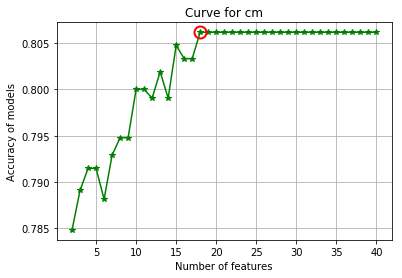

Highest accuracy of entropy model with 18 features selected: 0.8061611374407583


In [67]:
# Graph for CM
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(N_features, accuracy_list_cm, 'g*-')
ax.plot(N_features[16], accuracy_list_cm[16], marker='o', markersize=12, markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of features')
plt.ylabel('Accuracy of models')
plt.title('Curve for cm')

plt.show()

print("Highest accuracy of entropy model with 18 features selected: " + str(accuracy_list_cm[16]))

model13 = model_summary("Adaboost improved",best_acc,best_sensi,best_precision,best_kf,best_auc)

 # 5. Comparison of models

In [95]:
results = pd.concat([model1,model2,model3,model4,model5,model6,model7,model8,model9,model10,model11,model12,model13])
results.reset_index(drop = True, inplace = True)
results.head(13)

,Model,Accuracy,Sensitivity,Precision,k-fold,Area_under_curve
0,Decision tree baseline entropy,0.734597,0.497400,0.515260,0.740899,0.662515
1,Decision tree improved entropy,0.743602,0.521664,0.531802,0.739052,0.674400
2,Decision tree baseline gini,0.729858,0.502600,0.506108,0.736206,0.662260
3,Decision tree improved gini,0.739336,0.523397,0.523397,0.727247,0.672005
4,Logistic regression l1,0.806161,0.561525,0.675000,0.805460,0.846647
5,Logistic regression l2,0.806161,0.561525,0.675000,0.805460,0.846639
6,Bagging,0.793839,0.518198,0.655702,0.782564,0.821683
7,Random forest baseline entropy,0.791943,0.493934,0.659722,0.785122,0.824632
8,Random forest improved entropy,0.795735,0.509532,0.665158,0.790953,0.706495
9,Random forest baseline gini,0.788152,0.483536,0.651869,0.785410,0.820807


In [108]:
# Source: https://www.kaggle.com/pavanraj159/telecom-customer-churn-prediction
import plotly.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import iplot

def output_tracer(metric,color) :
    tracer = go.Bar(y = results["Model"] , x = results[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = "metric",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )


trace1  = output_tracer("Accuracy","orange")
trace2  = output_tracer('Sensitivity',"red")
trace3  = output_tracer('Precision',"lightblue")
trace4  = output_tracer('k-fold',"lightgrey")
trace5  = output_tracer('Area_under_curve',"yellow")

data = [trace1,trace2,trace3,trace4,trace5]
fig = go.Figure(data=data,layout=layout)
iplot(fig)